# 3 Exploratory Data Analysis

## 3.1 Contents <a id='3.1_Contents'></a>
* [3.2 Introduction](#3.2_Introduction)
* [3.3 Imports](#3.3_Imports)
* [3.4 Load the Data](#3.4_Load_the_Data)
    * [3.4.1 Summary Statistics](#3.4.1_Summary_Statistics)
    * [3.4.2 Remove NaN values](#3.4.2_Remove_NaN_values)
    * [3.4.3 Map categorical features to numeric values](#3.4.3_Map_categorical_features_to_numeric_values)
* [3.5 Explore the data](#3.5_Explore_the_data)
    * [3.5.1 WordCloud by Title](#3.5.1_WordCloud_by_Title)
    * [3.5.2 WordCloud by Text](#3.5.2_WordCloud_by_Text)
    * [3.5.3 Histograms of True and Fake labels in the data](#3.5.3_Histograms_of_True_and_Fake_labels_in_the_data)
    * [3.5.4 Pie-chart showing various data sources](#3.5.4_Pie-chart_showing_various_data_sources)
    * [3.5.5 Number of characters in each sentence](3.5.5_Number_of_characters_in_each_sentence)
    * [3.5.6 Average length of word in each sentence](3.5.6_Average_length_of_word_in_each_sentence)
* [3.6 Visualizing high dimensional data](#3.6_Visualizing_high_dimensional_data)
    * [3.6.1 Creating unigrams from vectorized data](#3.6.1_Visualizing_high_dimensional_data)
    * [3.6.2 Creating bigrams from vectorized data](#3.6.2_Creating_bigrams_from_vectorized_data)
    * [3.6.3 Creating trigrams from vectorized data](3.6.3_Creating_trigrams_from_vectorized_data)
* [3.7 Summary](#3.7_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
import nltk.corpus
import seaborn as sns
from matplotlib import rcParams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

## 3.4 Load the Data<a id='3.4_Load the Data'></a>

In [2]:
df = pd.read_csv('cleaned_data.csv',index_col=None)

### 3.4.1 Summary Statistics<a id='3.4.1_Summary Statistics'></a>

In [3]:
df.describe()

title  \
count                                        44898   
unique                                       38681   
top     factbox  trump fill top job administration   
freq                                            14   

                                                     text       subject  \
count                                               44267         44898   
unique                                              38637             8   
top      reuters   highlights us president donald trum...  politicsnews   
freq                                                    8         11272   

                      date  label  
count                44898  44898  
unique                2397      2  
top     December 20, 2017    FAKE  
freq                   182  23481

### 3.4.2 Remove NaN values<a id='3.4.2_Remove_NaN_Values'></a>

In [4]:
df.label.value_counts()

FAKE    23481
TRUE    21417
Name: label, dtype: int64

### 3.4.3 Map categorical features to numeric values<a id='3.5.1_Map_categorical_features_to_numeric_values'></a>

In [5]:
df['label'] = df['label'].map({'FAKE':0, 'TRUE':1, np.nan:2} )

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

## 3.5 Explore the data<a id='3.5_Explore_the_data'></a>

In [8]:
df.head()

title  \
0  as us budget fight loom  republicans flip fisc...   
1  us military accept transgender recruit monday ...   
2  senior us republican senator  let mr mueller job    
3  fbi russia probe helped australian diplomat ti...   
4  trump want postal service charge much  amazon ...   

                                                text       subject  \
0  washington  reuters   the head conservative re...  politicsnews   
1  washington  reuters   transgender people allow...  politicsnews   
2  washington  reuters   the special counsel inve...  politicsnews   
3  washington  reuters   trump campaign adviser g...  politicsnews   
4  seattlewashington  reuters   president donald ...  politicsnews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1

In [9]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 1000,
        height = 500,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

### 3.5.1 WordCloud by True Label<a id='3.5.1_WordCloud_by_True_Label'></a>

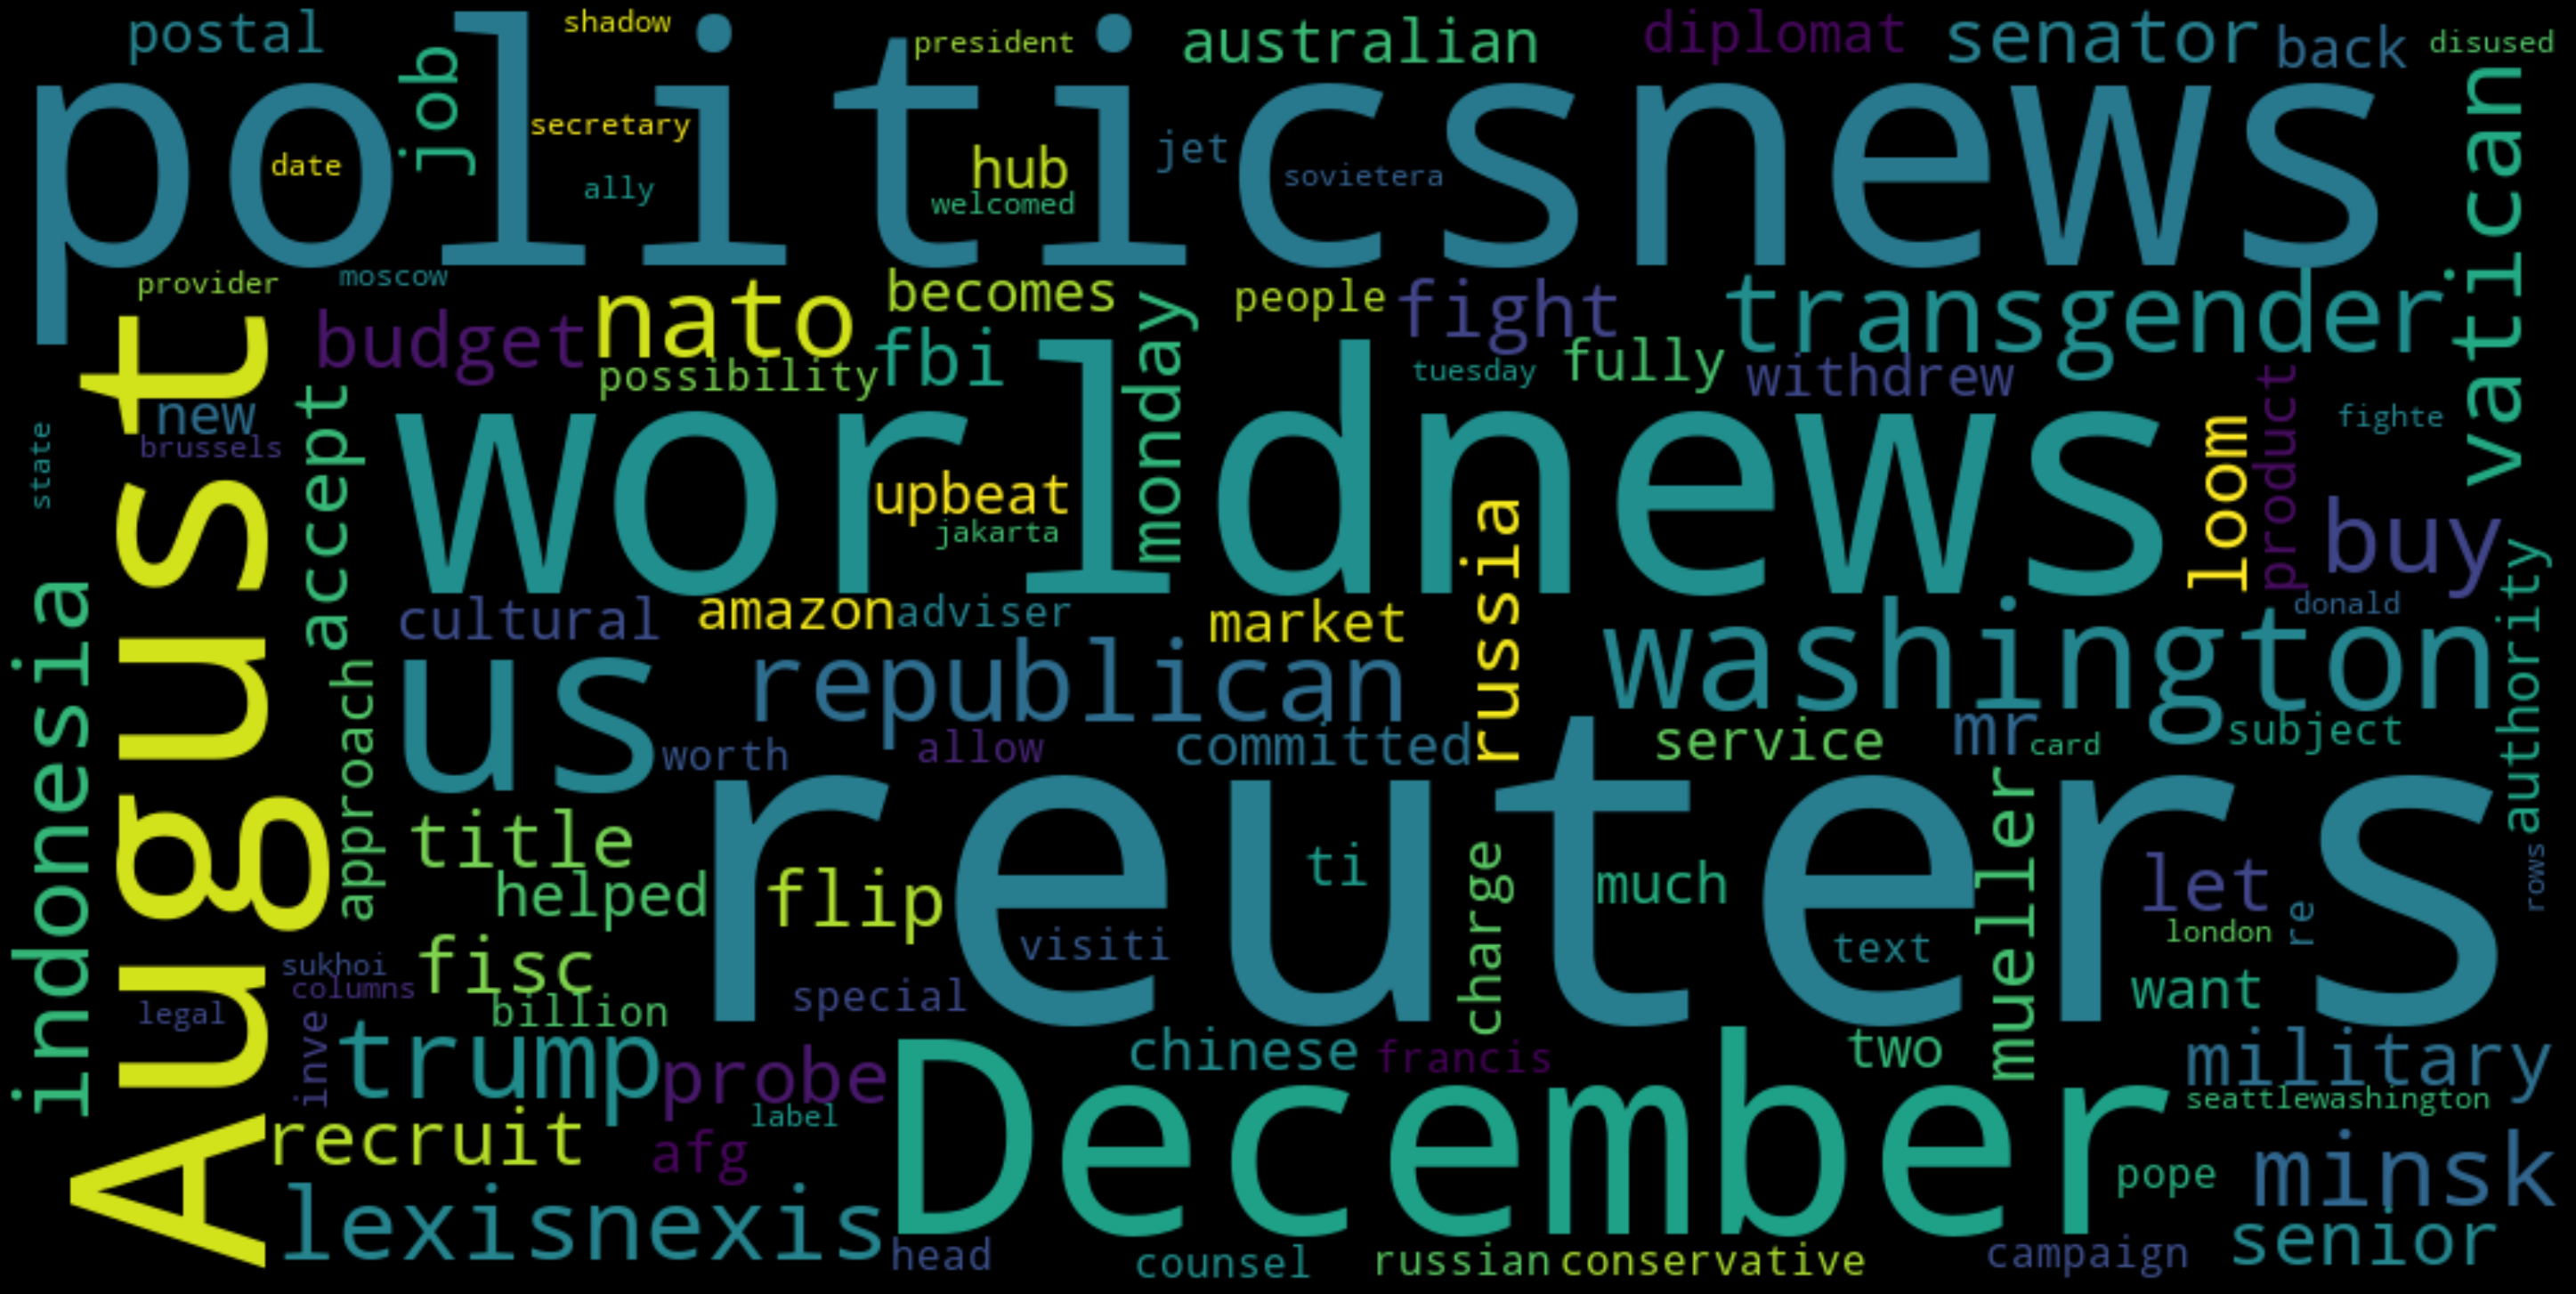

In [10]:
df_true = df[df['label'] == 1 ]

generate_word_cloud(df_true)

### 3.5.2 WordCloud by Fake Label<a id='3.5.2_WordCloud_by_Fake Label'></a>

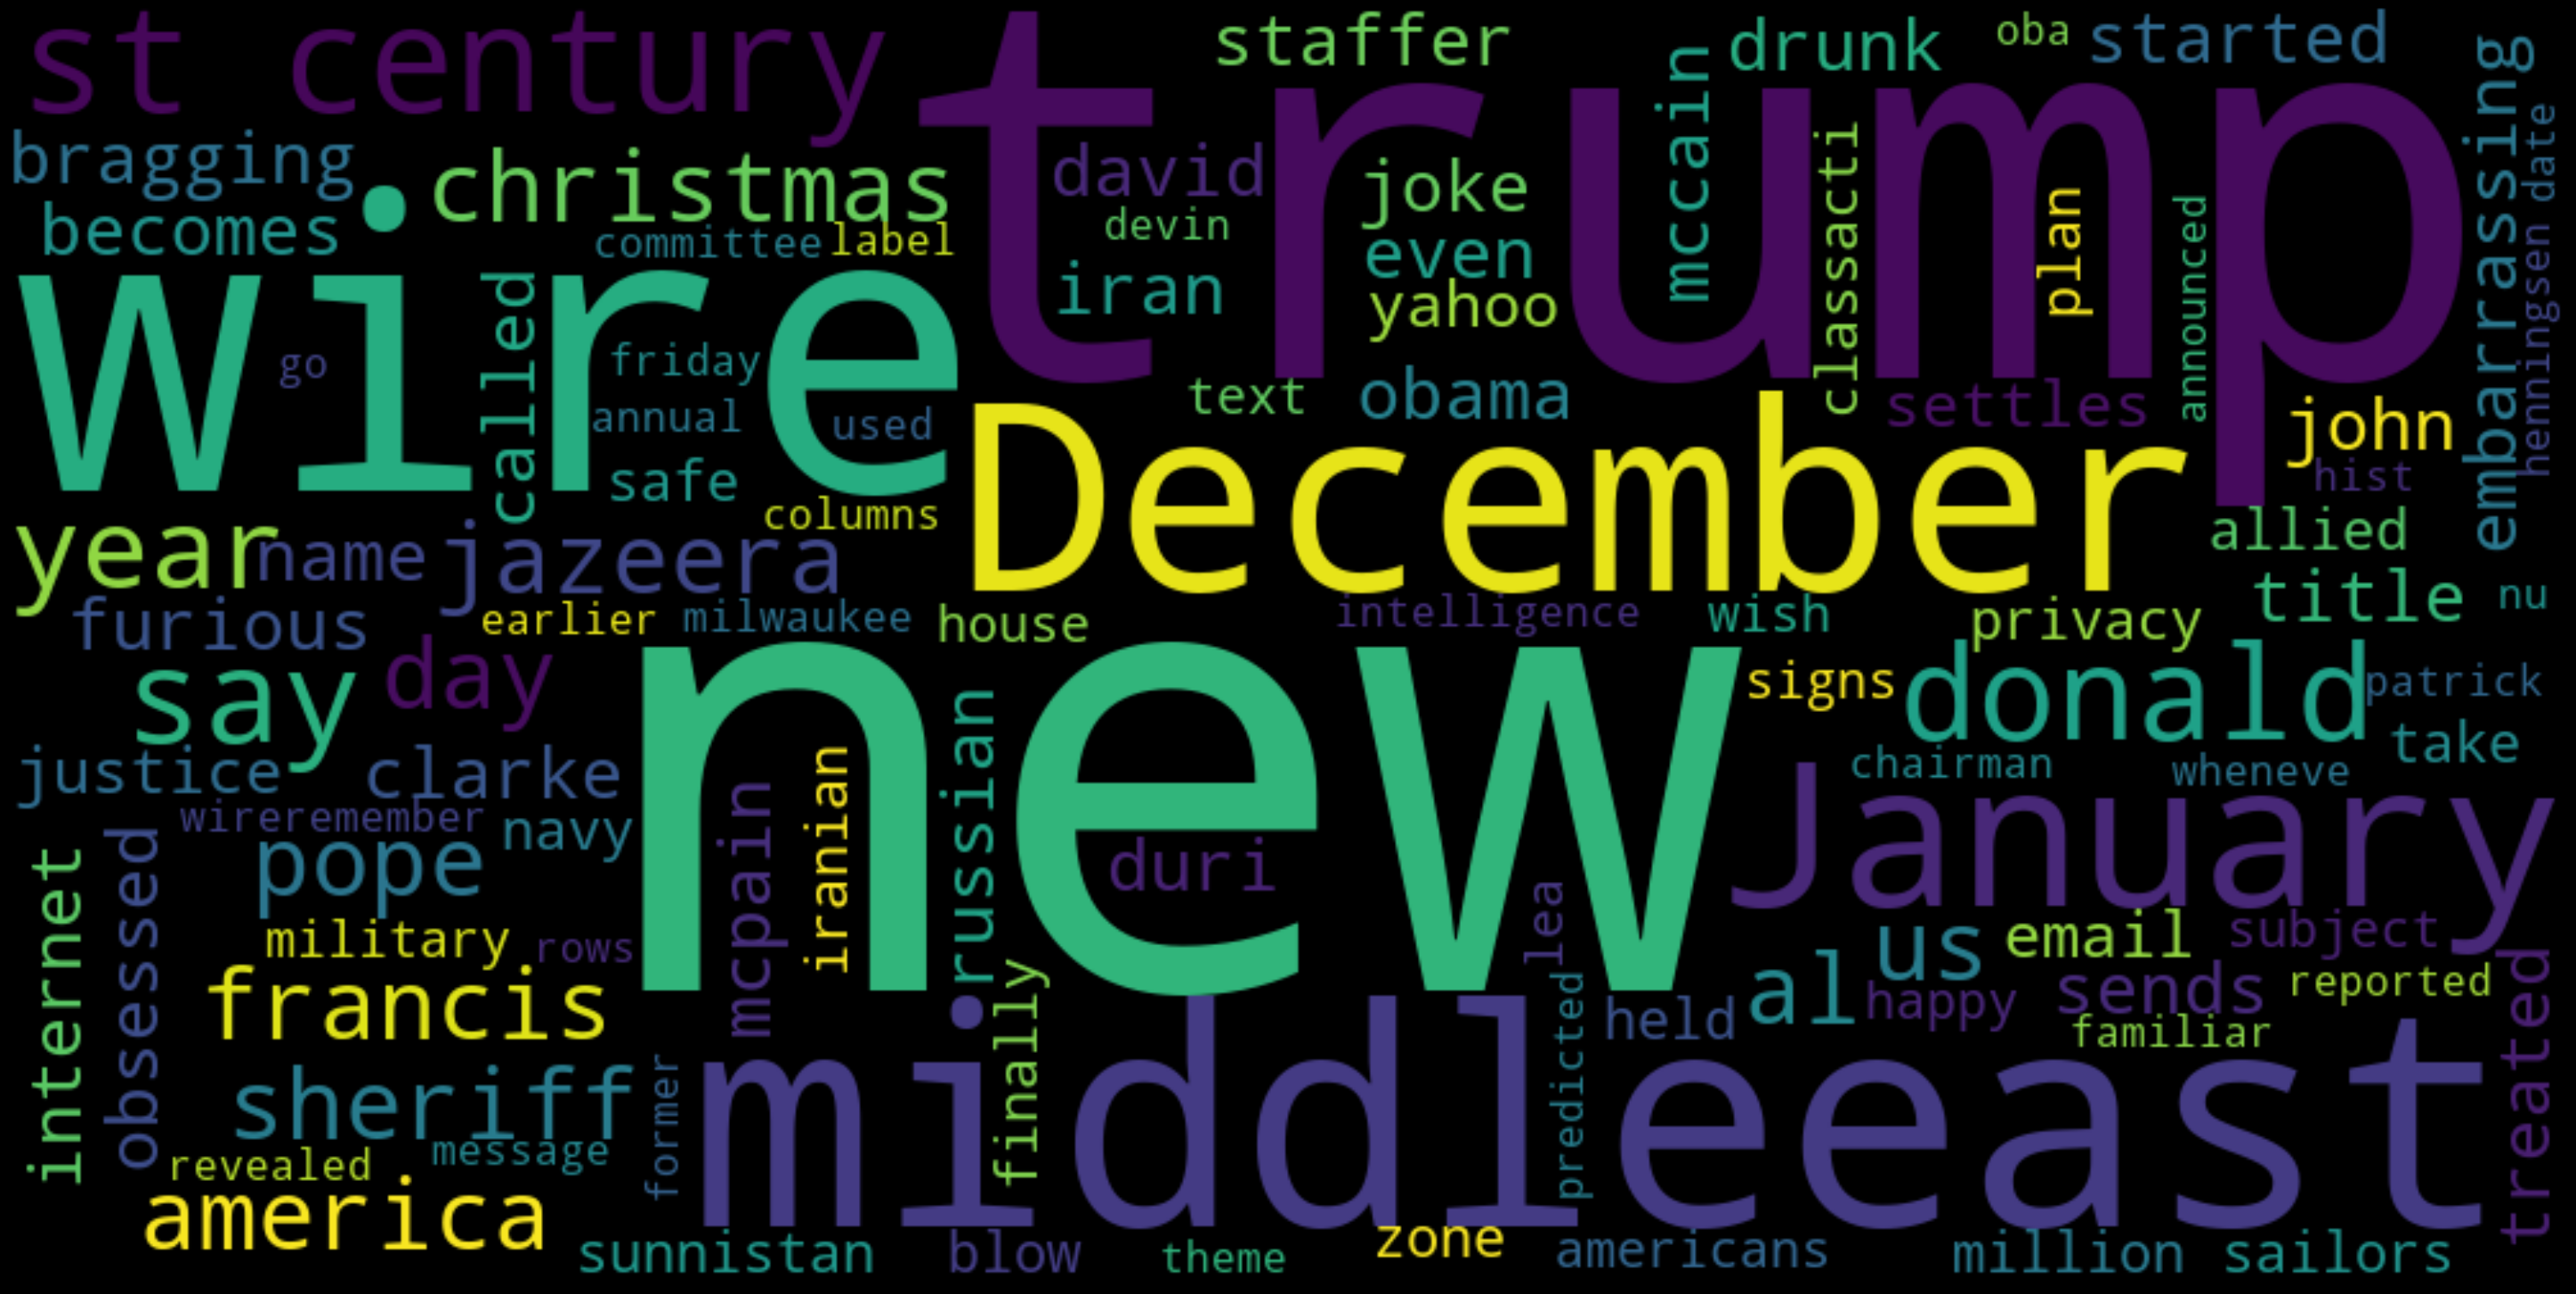

In [11]:
df_fake = df[df['label'] == 0 ]

generate_word_cloud(df_fake)

### 3.5.3 Histograms of True and Fake labels in the data<a id='3.5.3_Histograms_of_True_and_Fake_labels_in_the_data'></a>

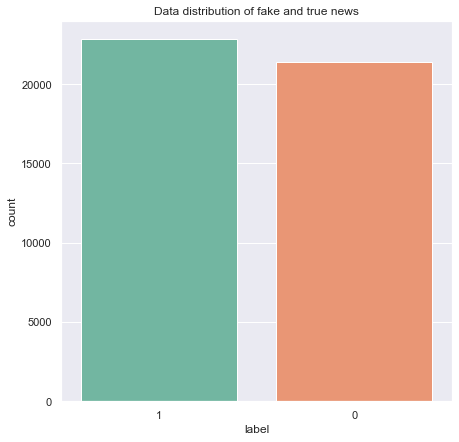

In [12]:
plt.figure(figsize=(7, 7))
sns.set(style="darkgrid")

color = sns.color_palette("Set2")
ax = sns.countplot(x="label", data=df, palette=color)

ax.set(xticklabels=df.label.unique())

plt.title("Data distribution of fake and true news")
plt.show()

### 3.5.4 Pie-chart showing various data sources<a id='3.5.4_Pie-chart_showing_various_data_sources'></a>

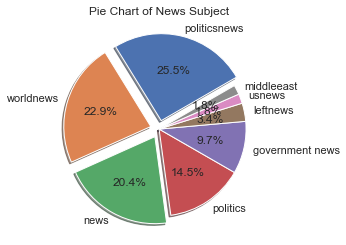

In [13]:
slices = df.subject.value_counts().to_list()
label = df.subject.unique()
explode = (0.1, 0.1, 0.1, 0,0,0,0,0) 
plt.pie(slices, labels = label, startangle = 30, shadow = True, explode=explode,autopct='%1.1f%%')
plt.title('Pie Chart of News Subject')
plt.show()

### 3.5.5 Number of characters in each sentence<a id='3.5.5_Number_of_characters_in_each_sentence'></a>

Here we will explore the number of characters in each sentence and analyze if there is a difference in the character count for Fake and True news. 

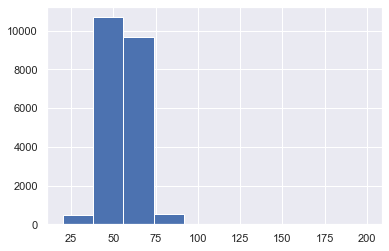

In [14]:
df_true['title'].str.len().hist(bins=10,range=[20,200])
plt.show()

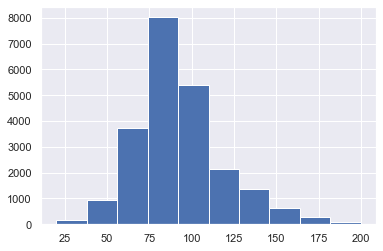

In [15]:
df_fake['title'].str.len().hist(bins=10,range=[20,200])
plt.show()

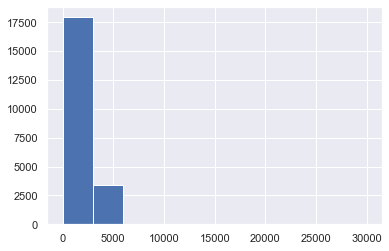

In [16]:
df_true['text'].str.len().hist(bins=10,range=[0,30000])
plt.show()

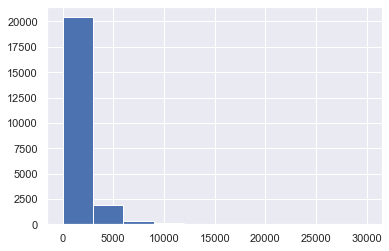

In [17]:
df_fake['text'].str.len().hist(bins=10,range=[0,30000])
plt.show()

### 3.5.6 Average length of word in each sentence<a id='3.5.6_Average_length_of_word_in_each_sentence'></a>

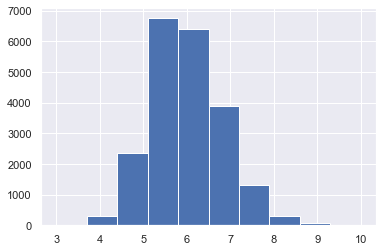

In [18]:
df_true['title'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=10, range=[3.0, 10])
plt.show()

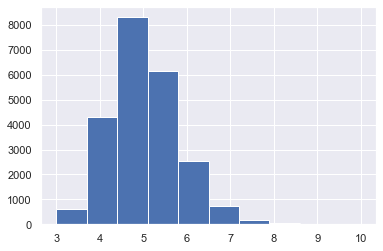

In [19]:
###try binning it not based on max min and make the plots similar for comparison
df_fake['title'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=10, range=[3.0, 10])
plt.show()

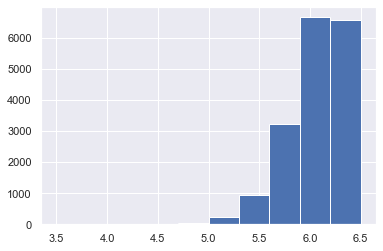

In [20]:
df_true['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=10, range=[3.5, 6.5])
plt.show()

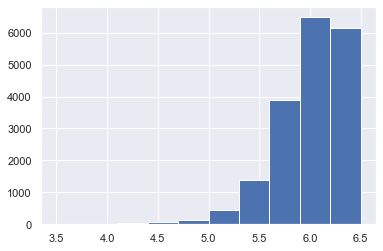

In [21]:
df_fake['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=10, range=[3.5, 6.5])
plt.show()

## 3.6 Visualizing high dimensional data<a id='3.6_Visualizing_high_dimensional_data'></a>

### 3.6.1 Creating unigrams from vectorized data<a id='3.6.1_Creating _unigrams_from_vectorized_data'></a>

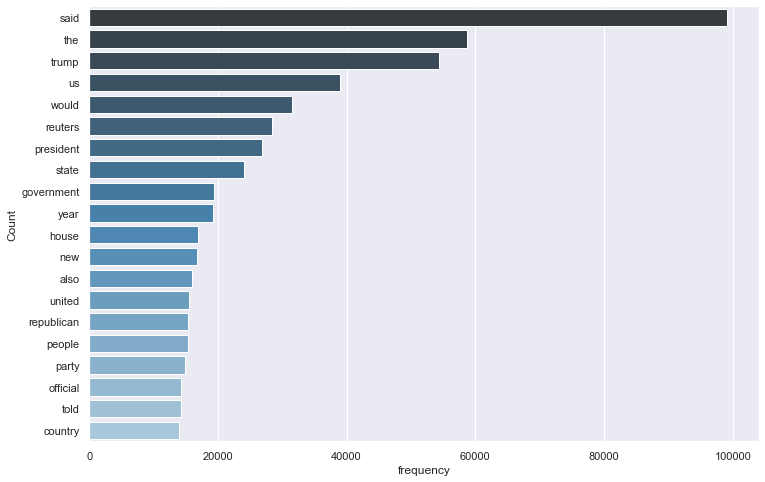

In [22]:
#top 20 unigrams
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_true['text'])
frequencies = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
word = word.nlargest(columns = "frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Blues_d"))
sns.set_context("poster")
ax.set(ylabel = "Count")
plt.show()

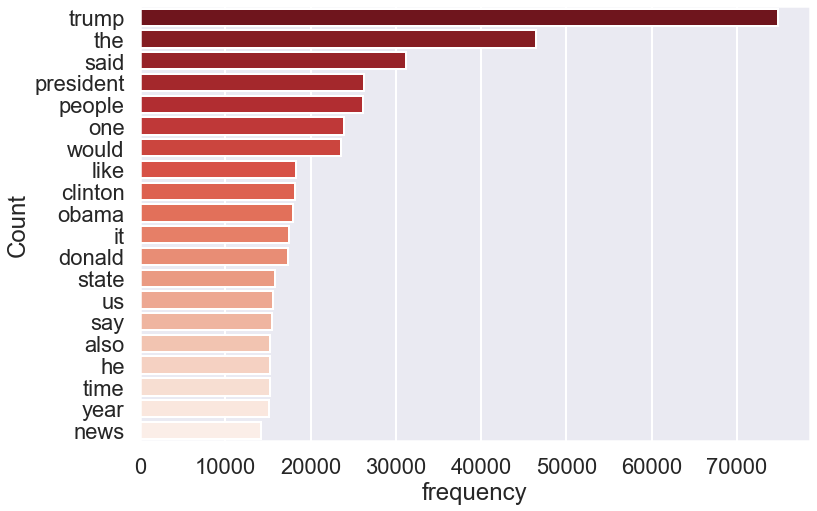

In [23]:
#top 20 unigrams
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_fake['text'])
frequencies = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
word = word.nlargest(columns = "frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Reds_r"))
sns.set_context("poster")
ax.set(ylabel = "Count")
plt.show()

### 3.6.2 Creating bigrams from vectorized data<a id='3.6.2_Creating _bigrams_from_vectorized_data'></a>

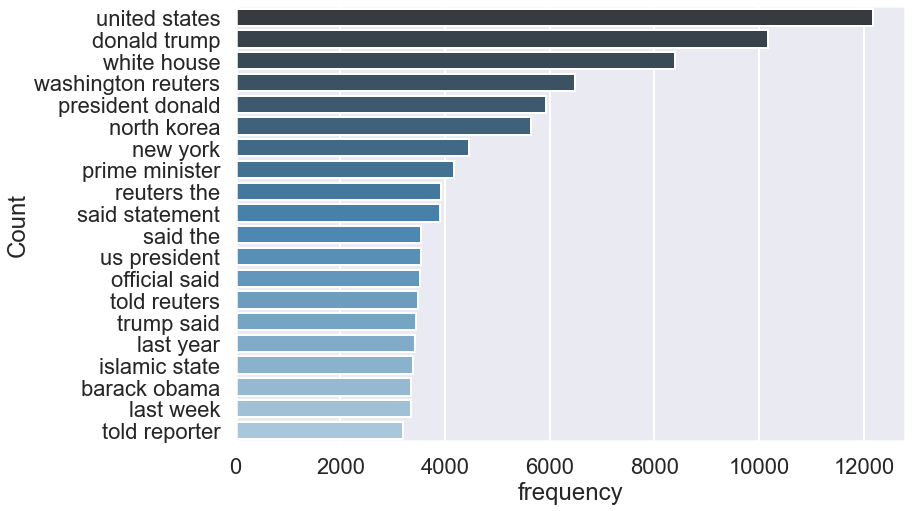

In [24]:
##top 20 bigrams
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_true.text)
frequencies = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
word = word.nlargest(columns = "frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Blues_d"))
sns.set_context("poster")
ax.set(ylabel = "Count")
plt.show()

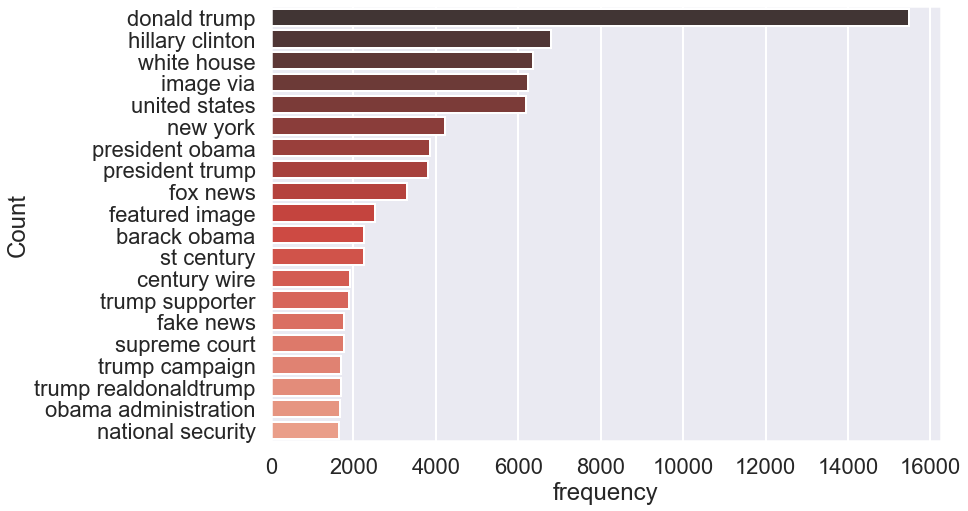

In [25]:
##top 20 bigrams
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_fake.text)
frequencies = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
word = word.nlargest(columns = "frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Reds_d"))
sns.set_context("poster")
ax.set(ylabel = "Count")
plt.show()

### 3.6.3 Creating trigrams from vectorized data<a id='3.6.3_Creating _trigrams_from_vectorized_data'></a>

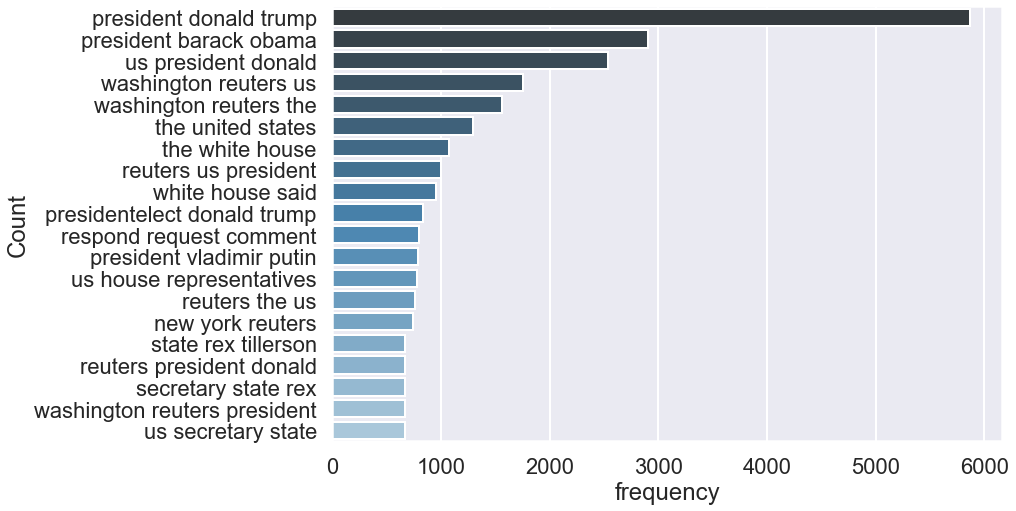

In [26]:
##top 20 trigrams
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_true.text)
frequencies = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
word = word.nlargest(columns = "frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Blues_d"))
sns.set_context("poster")
ax.set(ylabel = "Count")
plt.show()

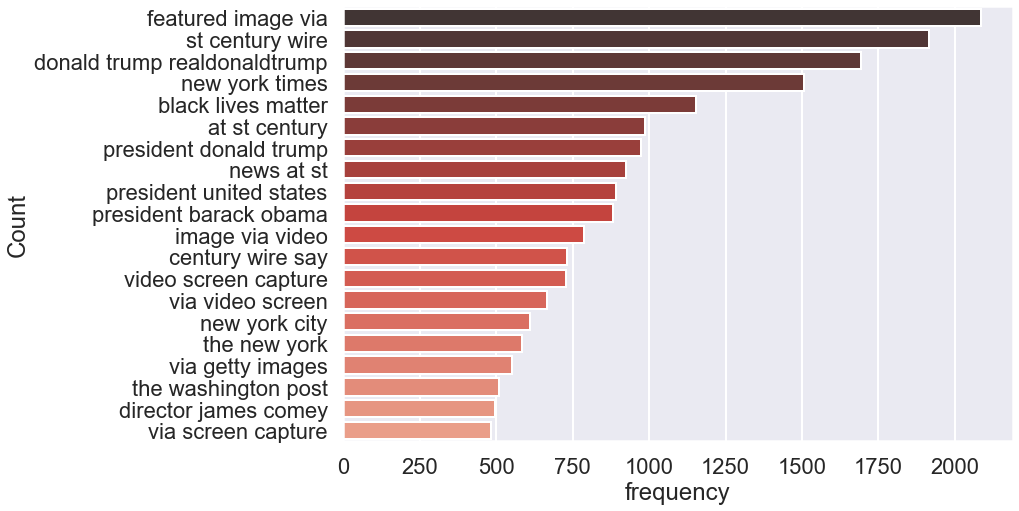

In [27]:
##top 20 trigrams
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_fake.text)
frequencies = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
word = word.nlargest(columns = "frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Reds_d"))
sns.set_context("poster")
ax.set(ylabel = "Count")
plt.show()

## 3.7 Summary<a id='3.7_Summary'></a>

The dataset has a balanced number of both TRUE and FAKE classes.  Few things can be observed in the text that demarcates the tow labels:
 * Number of characters in 'title' for True labels are mostly between 50 to 100. For Fake labels this has a wide range of variations suggesting that data are collected from different sources. 
 * Average length of sentences are very similar for both classes.
 
Looking at the n-grams and the word cloud it is evident that the news mostly contains political content and president Trump is most common across both labels.